In [18]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA

In [35]:
# load the dataset
ventura_df=pd.read_excel('Ventura.xlsx')

In [20]:
ventura_df.head()

,Permit #,Permitee,Site ID,Site Location,Meridian,Township,Range,Section,Application Date,Application Time,Commodity,Planted Amount,EPA Reg No,Product Name,Quantity Used,Quantity Units,Treated Amount,Treated Units,Appl. Method
0,56P0101,23rd AVE PROPERTIES LLC,01,1011 GRAND AVE,S,04N,23W,1.0,2015-12-18,11:08:00,LEMON,0.5,34704-1028-AA,LEAF LIFE GAVICIDE GREEN 415,0.13,Gallon,0.5,ACRES,Ground
1,56P0101,23rd AVE PROPERTIES LLC,01,1011 GRAND AVE,S,04N,23W,1.0,2015-12-18,11:08:00,LEMON,0.5,1021-1772-AA,PYGANIC CROP PROTECTION EC 5.0 II,0.06,Gallon,0.5,ACRES,Ground
2,56P0101,23rd AVE PROPERTIES LLC,01,1011 GRAND AVE,S,04N,23W,1.0,2015-12-28,08:37:00,LEMON,0.5,34704-1028-AA,LEAF LIFE GAVICIDE GREEN 415,0.13,Gallon,0.5,ACRES,Ground
3,56P0101,23rd AVE PROPERTIES LLC,01,1011 GRAND AVE,S,04N,23W,1.0,2015-12-28,08:37:00,LEMON,0.5,1021-1772-AA,PYGANIC CROP PROTECTION EC 5.0 II,0.06,Gallon,0.5,ACRES,Ground
4,56P0101,23rd AVE PROPERTIES LLC,01,1011 GRAND AVE,S,04N,23W,1.0,2015-11-30,14:30:00,LEMON,0.5,1021-1772-AA,PYGANIC CROP PROTECTION EC 5.0 II,0.06,Gallon,0.5,ACRES,Ground


In [21]:
ventura_df.shape

(130215, 19)

In [22]:
ventura_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130215 entries, 0 to 130214
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Permit #          130215 non-null  object        
 1   Permitee          130215 non-null  object        
 2   Site ID           130215 non-null  object        
 3   Site Location     130013 non-null  object        
 4   Meridian          130193 non-null  object        
 5   Township          130193 non-null  object        
 6   Range             130193 non-null  object        
 7   Section           130193 non-null  float64       
 8   Application Date  130215 non-null  datetime64[ns]
 9   Application Time  130215 non-null  object        
 10  Commodity         130210 non-null  object        
 11  Planted Amount    130166 non-null  float64       
 12  EPA Reg No        130190 non-null  object        
 13  Product Name      130215 non-null  object        
 14  Quan

In [23]:
# stastitics summary
ventura_df.describe()

,Section,Planted Amount,Quantity Used,Treated Amount
count,130193.000000,130166.000000,1.302150e+05,130212.000000
mean,17.379575,601.173559,9.693970e+01,695.575991
std,10.070669,12931.631158,5.644757e+03,6942.460181
min,1.000000,0.100000,0.000000e+00,0.000000
25%,9.000000,25.000000,1.270000e+00,2.750000
50%,17.000000,57.000000,6.000000e+00,8.050000
75%,26.000000,125.000000,3.200000e+01,21.750000
max,36.000000,375000.000000,2.018041e+06,600000.000000


In [24]:
ventura_df[['Section','Planted Amount','Quantity Used','Treated Amount']].head(2)

,Section,Planted Amount,Quantity Used,Treated Amount
0,1.0,0.5,0.13,0.5
1,1.0,0.5,0.06,0.5


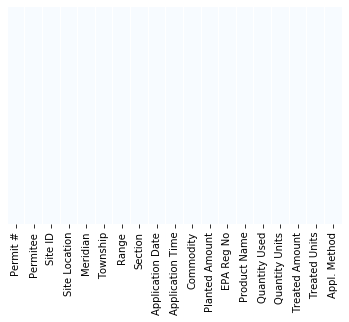

In [26]:
# How to find missing data
sns.heatmap(ventura_df.isnull(),yticklabels=False, cbar=False,cmap='Blues')

In [27]:
ventura_df.isnull().sum()

Permit #              0
Permitee              0
Site ID               0
Site Location       202
Meridian             22
Township             22
Range                22
Section              22
Application Date      0
Application Time      0
Commodity             5
Planted Amount       49
EPA Reg No           25
Product Name          0
Quantity Used         0
Quantity Units       15
Treated Amount        3
Treated Units         0
Appl. Method          1
dtype: int64

In [28]:
# let see if there is any duplicated data
ventura_df.duplicated().sum()

214

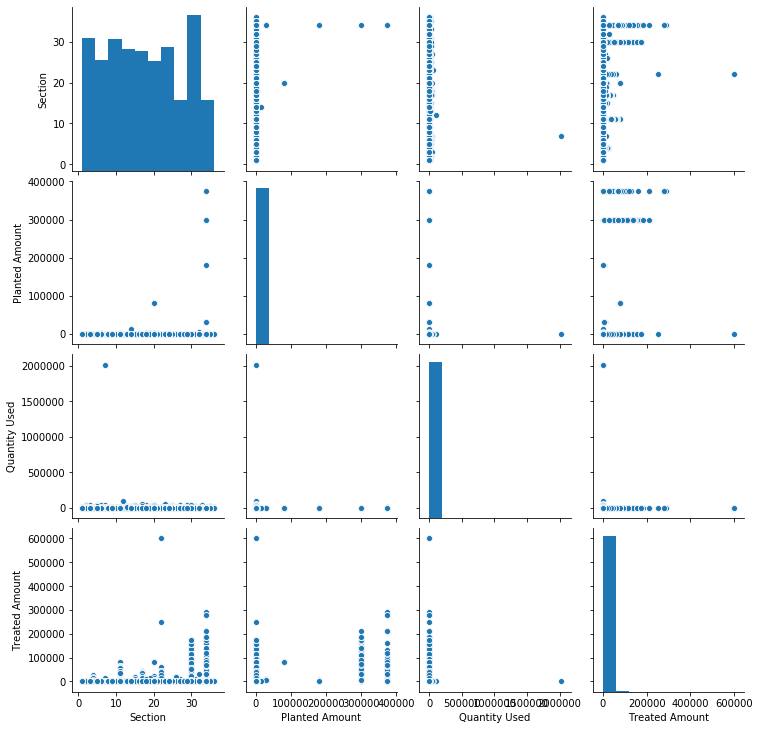

In [30]:
sns.pairplot(ventura_df)

In [31]:
correlations=ventura_df.corr()

In [32]:
correlations

,Section,Planted Amount,Quantity Used,Treated Amount
Section,1.000000,0.065371,-0.003648,0.094390
Planted Amount,0.065371,1.000000,-0.000278,0.332932
Quantity Used,-0.003648,-0.000278,1.000000,-0.000847
Treated Amount,0.094390,0.332932,-0.000847,1.000000


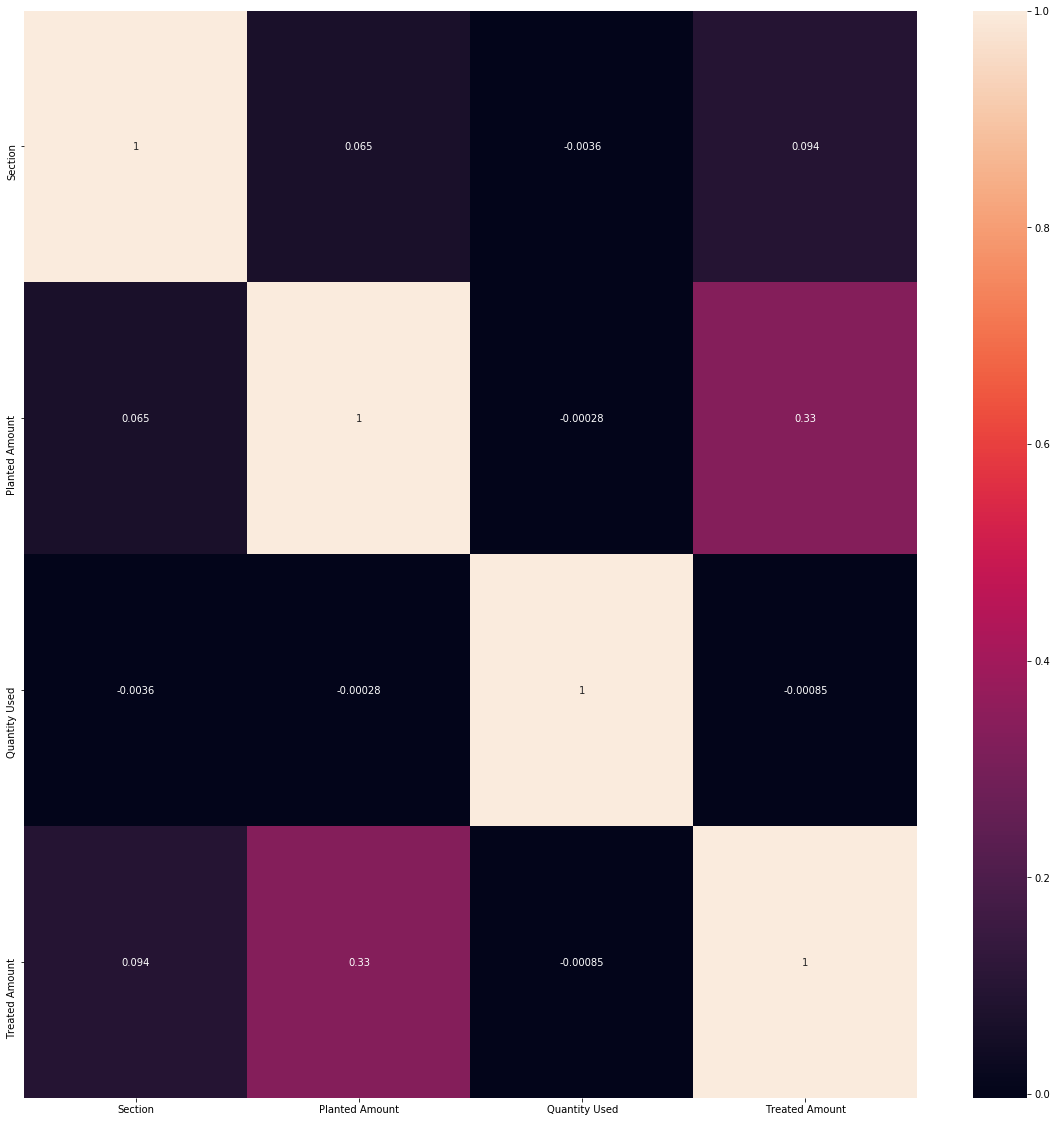

In [33]:
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True)